<a href="https://colab.research.google.com/github/VishnuPy/MyPython/blob/master/Kaggle_TitanicSurvival_Pred_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is followup to my earlier submission that has basically covered different MLAs with default parameters.
This Notebook is exclusively using XGBoost Parameter Tunning using GridSearch. Hence, points 1., 2., and 3. are same as in first submission only Build model onwards is the change. 

<font color=brown size=5>
Data Science Frame Work: 
<font color=black size=4>
    1. Define the Problem: Besides Algorithm, Model and Technology is defined, we need to get the Business Problem defined. Typically this happens with various Stakeholders getting together to articulate it for the Technology to provide sutle requirements like  trade-off between False Negatives and True Negative. These are not available in thie competition. However, we will stick to the Kaggle's evaluation criteria that is to predict the Survival Classifier (1 for Survived and 0 for Not-Survived). Will use Python to Build the Model. 
    2. Data Collection and Gathering: This would in reality be the task that require lots of efforts and resources. In this, case Kaggle has provided the for downloading (https://www.kaggle.com/c/titanic/data). 
    But, Data Analysis and Correction w.r.t its integrity, meaning, abberations (Outliers and Missing data) is still to be done and that will be done during Data Clearning activity and thereafter Data Tranformation to make it ready for Machine's consumption. This is usually referred to as Data Wrangling. 
    3. Exploratory Data Analysis: To understand data in Satistical terms that is Correlations and Linearity between and among Features. Identifying Univariate and Multivariate variables. This can be done either in Pivot and/or Graphical representation. This is where the sutle requirement of Hypothesis and rejection of it with Significance and Confidence will have to be done. 
    4. Build Model with Data: Preparing the Model to arrive at the rules based on the Data and the Outcome. Data and Expected Outcome will determine the Algorithm to be used. Its not that selecting an Algorithm will be produce the desired output and thruput as it requires the Techiniques and Tricks that are at the Craftman's (call him/her DataScient) disposal. Typically, this forms the Activity of Building and Training the Model. 
    5. Validate the Model: Validation is the critical step and again Craftmanship comes into play in selecting the Data for Validation(s). This step is significant as it eludicidates if the Model is fit to Predict for Known Data (in ML terminology Overfit) or can work equally good with unseen Data. The opposite of Overfitting is Underfitting and that tells us that the Model is not designed for it to grasp the completeness of the Dataset to understand various possibilities. This is also called Generalized Model. In either of the cases, will have to go back to Previous steps to inculcate the required changes for the Model to have Best fit (Training). 
    6. Optimize and Strategize: This is task where certain Technical Or Repetative tasks can be given to the Data Engineer and to concerntrate on Optimizing the Model Performance. This is an ongoing tasks as it is expected in real-world that new data keeps coming and required Model to be retrained to maintain the Performance and Prediction Accuracy. 
<font color=brown size=4>
    This kernal starts with Point 2 as first one is already taken care by Kaggle and First part of point 2, of having Raw Data making available for this Competition is also done by Kaggle as well. 
<font size=3>
    We can make use of popular Libraries Python3.x for Data Wrangling. <br>
    2.1 Importing Libraries

In [0]:
import pandas as pd # for data processing and analysis modeled
import matplotlib   # for scientific and visualization
import numpy as np  # for scientific computing
import scipy as sp  # for scientific computing and mathematics Functions
import IPython 
from IPython import display #  printing of dataframes in Jupyter notebook
import sklearn      # for machine learning algorithms

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<font color=brown size=4>
    2.2 Get to know the Data and go a step further to look at the Individual Charactertics and few more steps further towards gaining knowledge of Dependencies among data parts (Features) of the Data Point (Row)

In [0]:
data_raw = pd.read_csv('../input/titanic/train.csv') # this is the data for training and our Evaluation

data_val = pd.read_csv('../input/titanic/test.csv') # this is provided by Kaggle and to be used to Submit the final Predictions

# make a copy for future usage to check on data.
data_train = data_raw.copy(deep = True)
data_test = data_val.copy(deep = True)

print (data_train.info())
print ("#"*50)
print (data_test.info())
print ("#"*50)

"""
Combine both Test and Train Datasets for doing analysis on Categorical values (Classes) that may be present 
only in Test but not in Training Dataset
"""
data_combine = [data_train, data_test]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket      

<font color=brown size=5>
2.2 Data Analysis <nr>
<font color=brown size=4>
2.2.1 DataTypes: <br>
<font color=black size=3>
1. There are two continuous quantitative variable namely, Age and Fare. This is in case of both Train and Test datasets.
2. There are 5 variable with Object Datatype, meaning, these could be free-flowing Nominal Datatype or Categorical
3. There are 5 and 4 Numerical values in Train and Test Datasets respectively. These again could be Ordinal or Nominal. However, the difference between Train and Test is that Survived Variable is not in Test Dataset. This is the Dependent varilable and the rest are potential Independent variables that could be included in the Model for it to come up with the Predictions. 
    
<font color=brown size=4>
2.2.2 MissingData: <br>
<font color=black size=3>
1. In Training Dataset, Age and Cabin Features have missing values. 20% of Age values are missing, where as 80% of Cabin are missing. Will have to retain Age as missing values are less than the Standard prescription that is 40%, moreover, we will have to check Relevance of Age on Survial Chances. Eventhough Cabin has more missing values, relevance (or inference) is to be extracted so as to make a decision. Same with Test Dataset However in Test Dataset, additionally one Fare value missing. This value is to be imputed and probably with relevant Mean value.

In [0]:
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<font color=brown size=4>
2.2.3 Individual Feature Analysis <br>
<font size=4>
2.2.3 Categorical values: Going by the above
<font color=black size=3>
    > Survived Feature is already numeric and its Categorical, 1 Denotes Survived and 0 denotes otherwise.  <br>
    > Pclass -- is Ordinal and denotes 1=Upper, 2=Middle 3=Lower and already in numeric format  <br>
    > Name is a Nominal type and as it is is of no use in the Predictor Model.<br>
    > Sex is categorical and in nominal format. Hence, this should be convered to numeric type.  <br>
    > SibSp (Sibling & Spouse) and Parch (Parent & Children) are numeric fields and are Ordinal in nature. <br>
    > Ticket value is Alpha-numerica and a unique value like PassengerId. These can be dropped.<br>
    > Overall Training Sample Numeric Data Distribution after high level analysis: <br>
            >> Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).<br>
            >> Survived is a categorical feature with 0 or 1 values. <br>
            >> Around 38% samples survived representative of the actual survival rate at 32%. <br>
            >> Most passengers (> 75%) did not travel with parents or children. <br>
            >> Nearly 30% of the passengers had siblings and/or spouse aboard. <br>
            >> Fares varied significantly with few passengers (<1%) paying as high as $512. <br>
            >> Few elderly passengers (<1%) within age range 65-80. <br>

In [0]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nicholson, Mr. Arthur Ernest",male,347082,B96 B98,S
freq,1,577,7,4,644


<font color=brown size=4>
2.3.3 Overall Training Sample set Categorical Data Distribution is: <br>
    <font color=black size=3>
> Names are unique across the dataset (count=unique=891). <br>
> Sex variable as two possible values with 65% male (top=male, freq=577/count=891). <br>
> Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin. <br>
> Embarked takes three possible values. S port used by most passengers (top=S). <br>
> Ticket feature has high ratio (22%) of duplicate values (unique=681). <br>

<font color=brown size = 4>
2.2.4 Assumption based on the Data Analysis done so far <br> 
<font color=brown size = 3> Correlation:<br> <font color=black> We will have know how each Feature (or the features that would be included in the model) with Survied Feature. Importantly, these are to be done so as to compare with the Modelled Correlation later. <br> 
<font color=brown size = 3> Completing: <font color=black> <br>
    Age Feature data is to be completed as it seem to have strong correlation with Survived Feature. <br>
    Embarked feature also have correlation with the Survived Feature and needs to be completed (imputing)
<font color=brown size = 3> Correcting: <font color=black> <br>
    Ticket Feature has 22% duplicate values and does not contribute much to the Prediction. This field will be dropped. <br><br> 
    Cabin Feature as it is incomplete and has high number of missing values in both Training and Validation Datasets. <br> <br>
    PassengerId will be dropped as this is unique value and certainly have no impact on Survived Feature. <br> <br>
    Name Feature also may not have much contribution and will be dropped. 
<font color=brown size = 3> Creating: <font color=black> <br>
    SibSp and Parch are two Features that more or less convey the Familysize. A new feature FamilySize will be created by combinig these two. This new feature gives out number of Family members onboarded. <br> <br>
    Name Feature has Title in it which can be used alogn with Sex to establish some kind of correlation. <br><br>
    Age and Fare Features are a continous numeric value and will have to create a new Ordinal Categorical Field to bucket them in different ranges. <br> <br>
<font color=brown size = 3> Classifying: <font color=black> <br>
    Sex Feature to be classified. Women more likely to have survived <br> <br>
    Age Feature: Children were more likely to have survived <br> <br>
    Pclass Feature: Upper Class (Pclass=1) were more likely to have survived. 

<font color=brown size=4>
    Data Exploration using Pivots and/or Visualization

In [0]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass We observe significant correlation (>0.6) among Pclass=1 and Survived (classifying #3). Retain this feature in our model.

In [0]:
data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Assumption is confirmed that Sex=female had very high survival rate at 74% (classifying #1).

In [0]:
data_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
data_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


SibSp and Parch features have low or zero correlation as the counts go up. It may be best to derive a feature or a set of features from these individual features (creating #1).

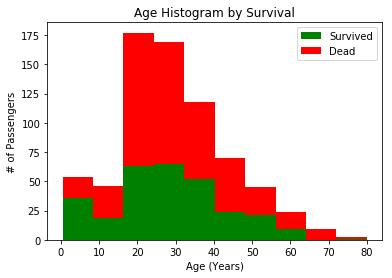

In [0]:
plt.hist(x = [data_train[data_train['Survived']==1]['Age'], data_train[data_train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

<font color=brown size=4>
Observations <br>
<font color=black size=3>
Infants (Age <=4) had high survival rate.<br>
Oldest passengers (Age = 80) survived.<br>
Large number of 15-25 year olds did not survive.<br>
Most passengers are in 15-35 age range. <br>
<font color=brown size=4>
Decisions<br>
<font color=black size=3>
This simple analysis confirms our assumptions<br>
We should consider Age (confirms our assumption) in our model training.<br>
Complete the Age feature for null values. <br>
We should create band age groups as New Feature. <br>

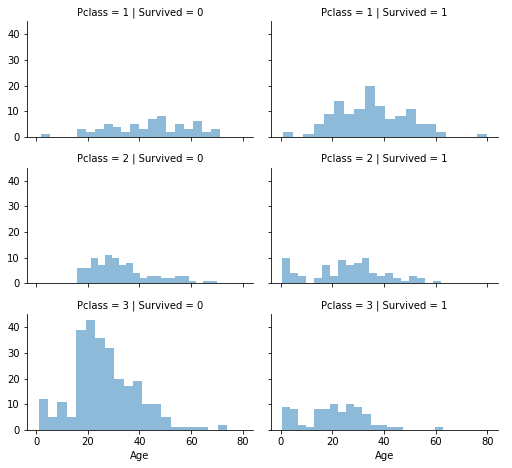

In [0]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<font color=brown size=4> 
Observations. <br>
<font color=black size=3> 
Pclass=3 had most passengers, however most did not survive. Confirms assumption.<br>
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies assumption. <br>
Most passengers in Pclass=1 survived. Confirms assumption. <br>
Pclass varies in terms of Age distribution of passengers. <br>

<font color=brown size=4> 
Decisions. <br>
<font color=black size=3> 
Consider Pclass for model training.

<font color=brown size=4>
3.1 Load Data Exploratory Libraries

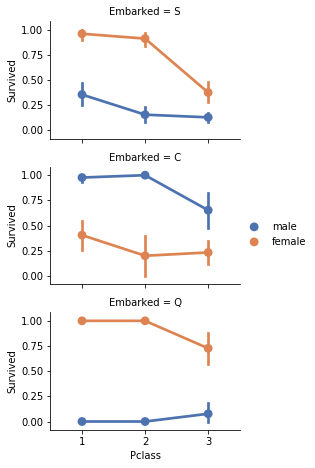

In [0]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(data_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<font color=brown size=4>
Observations <br>
<font color=black size=3>
Female passengers had much better survival rate than males. Confirms classifying assumption.  <br>
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived. <br>
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.  <br>
Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.  <br>

<font color=brown size=4>
Decisions <br>
<font color=black size=3>
Add Sex feature to model training.  <br>
Complete and add Embarked feature to model training.  <br>

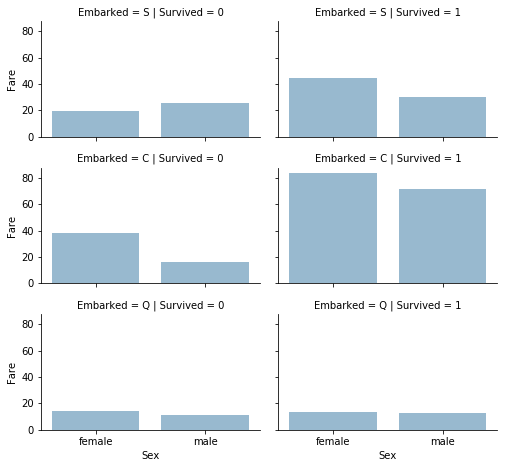

In [0]:
grid = sns.FacetGrid(data_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<font color=brown size=4> 
Observations <br>
<font color=black size=3>
Higher fare paying passengers had better survival. Confirms our assumption for creating fare ranges.<br>
Port of embarkation correlates with survival rates. Confirms correlating and completing assumptions. <br>

<font color=brown size=4> 
Decisions <br>
<font color=black size=3>
Consider banding Fare feature.

<font color=brown size=4> 
Wrangle data <br>
<font color=black size=3> 

With confirmed Assumptions and taken decisions, now time to work on Data to Create New Features, Dropping unncessisary Features and Converting Types of features and lastly imputing. 

<font color=brown size=4> 
Correcting by dropping features
<font color=black size=4> 

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [0]:
print("Before", data_train.shape, data_test.shape, data_combine[0].shape, data_combine[1].shape)

data_train = data_train.drop(['Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Ticket', 'Cabin'], axis=1)
data_combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, data_combine[0].shape, data_combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


<font color=brown size=4> 
Creating new feature extracting from existing <br>
    <font color=black size=3> 
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.<br>
<font color=brown size=4> 
Observations<br>
<font color=black size=3> 
When we plot Title, Age, and Survived, we note the following observations.

Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).<br>

<font color=brown size=4> 
Decision <br>
<font color=black size=3> 
We decide to retain the new Title feature for model training.

In [0]:
for dataset in data_combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.

In [0]:
for dataset in data_combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [0]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [0]:
data_train = data_train.drop(['Name', 'PassengerId'], axis=1)
data_test = data_test.drop(['Name'], axis=1)
data_combine = [data_train, data_test]
data_train.shape, data_test.shape

((891, 9), (418, 9))

<font color=brown size=4>
Converting a categorical feature <br>
<font color=black size=3>
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [0]:
for dataset in data_combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


<font color=brown size=4>
Completing a numerical continuous feature <br>
    <font color=black size=3>
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

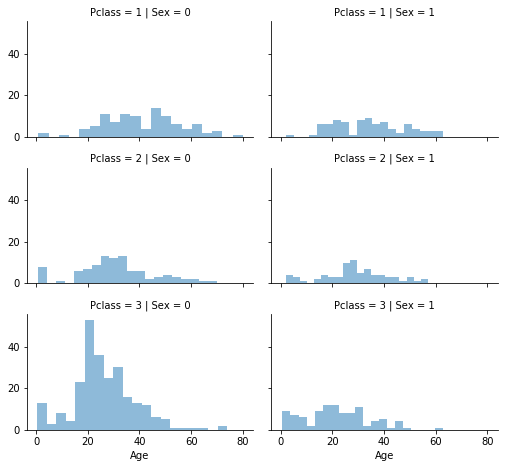

In [0]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(data_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [0]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [0]:
for dataset in data_combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [0]:
data_train['AgeBand'] = pd.cut(data_train['Age'], 5)
data_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [0]:
for dataset in data_combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [0]:
#AgeBand feature can be removed
data_train = data_train.drop(['AgeBand'], axis=1)
data_combine = [data_train, data_test]
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


<font color=brown size=4>
    Creating a new Feature: <br>
    <font color=black size=3>
    New FamilySize by addining up Sibsp and Parch

In [0]:
for dataset in data_combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

data_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [0]:
# another new feature called IsAlone. 

for dataset in data_combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

data_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [0]:
# with IsAlone field with good correlation with Survived Feature, can drop Parch, Sibsp and Familysize Features
data_train = data_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data_test = data_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data_combine = [data_train, data_test]

data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [0]:
# Another New feature combining Pclass and Age.
for dataset in data_combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

data_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


<font color=brown size=4>
    Completing a categorical feature <br>
    <font color=black size=3>
Embarked feature takes S, Q, C values based on port of embarcation. Our training dataset has two missing values. We simply fill these with the most common occurance

In [0]:
freq_port = data_train.Embarked.dropna().mode()[0]

for dataset in data_combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<font color=brown size=4>
    Converting categorical feature to numeric <br>
<font color=black size=3>
We can now convert the Embarked feature by creating a new numeric Port feature

In [0]:
for dataset in data_combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


<font color=brown size=4> 
Quick completing and converting a numeric feature <br>
<font color=black size=3>
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

In [0]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [0]:
# Fare has continous numeric data and hence to be converted to category range to make it categorical
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [0]:
# Convert the Fare feature to ordinal values based on the FareBand
for dataset in data_combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

data_train = data_train.drop(['FareBand'], axis=1)
data_combine = [data_train, data_test]

In [0]:
print (data_train.head(10))
print ("#"*75)
print (data_test.head(10))

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         0       3    0    1     0         0      1        0          3
1         1       1    1    2     3         1      3        0          2
2         1       3    1    1     1         0      2        1          3
3         1       1    1    2     3         0      3        0          2
4         0       3    0    2     1         0      1        1          6
5         0       3    0    1     1         2      1        1          3
6         0       1    0    3     3         0      1        1          3
7         0       3    0    0     2         0      4        0          0
8         1       3    1    1     1         0      3        0          3
9         1       2    1    0     2         1      3        0          0
###########################################################################
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2     0       

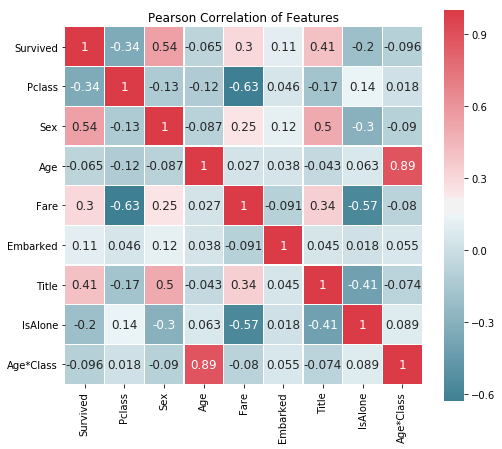

In [0]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(8, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data_train.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.6 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=12)

correlation_heatmap(data_train)

In [0]:
#set correlation above 0.75 and see true/false values
abs(data_train.corr())> 0.50

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
Survived,True,False,True,False,False,False,False,False,False
Pclass,False,True,False,False,True,False,False,False,False
Sex,True,False,True,False,False,False,True,False,False
Age,False,False,False,True,False,False,False,False,True
Fare,False,True,False,False,True,False,False,True,False
Embarked,False,False,False,False,False,True,False,False,False
Title,False,False,True,False,False,False,True,False,False
IsAlone,False,False,False,False,True,False,False,True,False
Age*Class,False,False,False,True,False,False,False,False,True


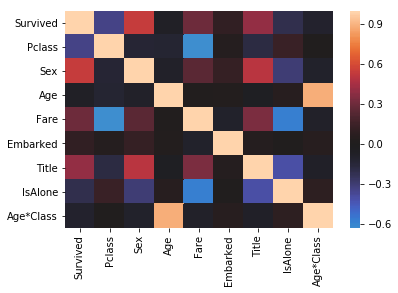

In [0]:
sns.heatmap(data_train.corr(), center=0);

<font color=brown size=4>
4.1 Load Data Modelling Libraries <br>
<font color=black size=3>
There are many Predictive Modelling Algorithms. However, for this submission will be using XGBoost Classifier as it stood 2nd best with default parameters and has potential to improve on performance. 

In [0]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
#X_test  = data_test.drop("PassengerId", axis=1).copy()
test_Titanic  = data_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, test_Titanic.shape

((891, 8), (891,), (418, 8))

<font color=brown size=5>
   XGBoost (Extreme Gradient Boosting)
<font color=black size=3>
    XGBoost is a decision tree-based Ensemble machine learning algorithm that uses Gradient Boosting framework. In prediction problems involving unstructured data (images, text etc) artificial neural networks tend to outperform other algorithm frameworks. However, when it comes to small-to-medium structure/tabular data, decision tree based algorithms are considered best-in class now. 
    
Evaluation of Ensemble models started with Decision trees, a graphical representation of possible solutions to a decision based on certain conditions.<br> 
    > <font color=brown size=4> Bootstraping aggregating or Bagging <font color=black size=3> ensemble meta-algorithms combining predictions from multiple decision trees through a voting mechaism, gave rise to Boosting Algorithms. <br>
    > Baggin-based algorithms where only <font color=brown size=4> sub-set of features are selected at random to build a forest <font color=black size=3> or collection of decision trees, gave rise to Random Forest Algorithm <br>
    > Models are <font color=brown size=4> build sequentially by minimizing errors <font color=black size=3> from previous models while increasing the influence of high-performing models, gave rise to Boosting Algorithms. <br>
    > On these Boosting Algorithms, when additionally <font color=brown size=4> employed Gradient Descent algorithm <font color=black size=3> to minimize errors, gave rise to Gradient Descent Algorithms. <br>
    > <font color=brown size=4> Optimized Gradient Boosting Algorithm <font color=black size=3> by employing parallel processing , tree purning, handling missing values and regularization to avoid overfitting (or Bias), gave rise to this new Queen of Machine Learning Algorithms. 


In [0]:
# machine learning
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score   #Perforing grid search and Cross Validation Score

In [0]:
"""
# starting of the Parameter setting should be with finding the right number of trees (n_estimators). 
# Use below to get the incremental addition of trees by XGBoost and Validation error stops reducing at a time and 
that would be our n_estimators
"""
eval_set = [(X_train, Y_train)]
eval_metric = ["auc","error"]
xgb_eval = XGBClassifier(n_estimators=1000)
xgb_eval.fit(X_train, Y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


#Parameters list can be found here as well: https://xgboost.readthedocs.io/en/latest/parameter.html


[0]	validation_0-auc:0.863385	validation_0-error:0.18743
[1]	validation_0-auc:0.868978	validation_0-error:0.178451
[2]	validation_0-auc:0.869159	validation_0-error:0.178451
[3]	validation_0-auc:0.869159	validation_0-error:0.178451
[4]	validation_0-auc:0.870357	validation_0-error:0.178451
[5]	validation_0-auc:0.872163	validation_0-error:0.178451
[6]	validation_0-auc:0.871811	validation_0-error:0.178451
[7]	validation_0-auc:0.875899	validation_0-error:0.178451
[8]	validation_0-auc:0.876421	validation_0-error:0.178451
[9]	validation_0-auc:0.878144	validation_0-error:0.178451
[10]	validation_0-auc:0.878378	validation_0-error:0.180696
[11]	validation_0-auc:0.878714	validation_0-error:0.180696
[12]	validation_0-auc:0.881086	validation_0-error:0.178451
[13]	validation_0-auc:0.882136	validation_0-error:0.180696
[14]	validation_0-auc:0.882159	validation_0-error:0.180696
[15]	validation_0-auc:0.881861	validation_0-error:0.178451
[16]	validation_0-auc:0.882064	validation_0-error:0.176207
[17]	val

[140]	validation_0-auc:0.908475	validation_0-error:0.15376
[141]	validation_0-auc:0.908513	validation_0-error:0.15376
[142]	validation_0-auc:0.908608	validation_0-error:0.15376
[143]	validation_0-auc:0.90864	validation_0-error:0.15376
[144]	validation_0-auc:0.908774	validation_0-error:0.15376
[145]	validation_0-auc:0.908805	validation_0-error:0.15376
[146]	validation_0-auc:0.908891	validation_0-error:0.15376
[147]	validation_0-auc:0.908891	validation_0-error:0.15376
[148]	validation_0-auc:0.908912	validation_0-error:0.15376
[149]	validation_0-auc:0.908965	validation_0-error:0.15376
[150]	validation_0-auc:0.908944	validation_0-error:0.15376
[151]	validation_0-auc:0.908987	validation_0-error:0.15376
[152]	validation_0-auc:0.908885	validation_0-error:0.15376
[153]	validation_0-auc:0.908848	validation_0-error:0.15376
[154]	validation_0-auc:0.908955	validation_0-error:0.15376
[155]	validation_0-auc:0.909008	validation_0-error:0.15376
[156]	validation_0-auc:0.908901	validation_0-error:0.1537

[278]	validation_0-auc:0.915346	validation_0-error:0.147026
[279]	validation_0-auc:0.915388	validation_0-error:0.147026
[280]	validation_0-auc:0.915388	validation_0-error:0.147026
[281]	validation_0-auc:0.915447	validation_0-error:0.147026
[282]	validation_0-auc:0.915479	validation_0-error:0.147026
[283]	validation_0-auc:0.91549	validation_0-error:0.147026
[284]	validation_0-auc:0.915538	validation_0-error:0.147026
[285]	validation_0-auc:0.91566	validation_0-error:0.147026
[286]	validation_0-auc:0.915687	validation_0-error:0.147026
[287]	validation_0-auc:0.915607	validation_0-error:0.147026
[288]	validation_0-auc:0.915591	validation_0-error:0.147026
[289]	validation_0-auc:0.915596	validation_0-error:0.147026
[290]	validation_0-auc:0.915644	validation_0-error:0.147026
[291]	validation_0-auc:0.915644	validation_0-error:0.147026
[292]	validation_0-auc:0.915655	validation_0-error:0.147026
[293]	validation_0-auc:0.915644	validation_0-error:0.147026
[294]	validation_0-auc:0.915575	validation

[415]	validation_0-auc:0.919468	validation_0-error:0.140292
[416]	validation_0-auc:0.91958	validation_0-error:0.140292
[417]	validation_0-auc:0.919543	validation_0-error:0.140292
[418]	validation_0-auc:0.919591	validation_0-error:0.140292
[419]	validation_0-auc:0.919612	validation_0-error:0.140292
[420]	validation_0-auc:0.919548	validation_0-error:0.140292
[421]	validation_0-auc:0.919537	validation_0-error:0.140292
[422]	validation_0-auc:0.919671	validation_0-error:0.140292
[423]	validation_0-auc:0.919633	validation_0-error:0.140292
[424]	validation_0-auc:0.919633	validation_0-error:0.140292
[425]	validation_0-auc:0.919692	validation_0-error:0.140292
[426]	validation_0-auc:0.919676	validation_0-error:0.140292
[427]	validation_0-auc:0.919724	validation_0-error:0.140292
[428]	validation_0-auc:0.919697	validation_0-error:0.140292
[429]	validation_0-auc:0.919697	validation_0-error:0.140292
[430]	validation_0-auc:0.919756	validation_0-error:0.140292
[431]	validation_0-auc:0.919745	validatio

[552]	validation_0-auc:0.92129	validation_0-error:0.140292
[553]	validation_0-auc:0.92129	validation_0-error:0.140292
[554]	validation_0-auc:0.92129	validation_0-error:0.140292
[555]	validation_0-auc:0.92129	validation_0-error:0.140292
[556]	validation_0-auc:0.921236	validation_0-error:0.140292
[557]	validation_0-auc:0.921231	validation_0-error:0.140292
[558]	validation_0-auc:0.92129	validation_0-error:0.140292
[559]	validation_0-auc:0.921306	validation_0-error:0.140292
[560]	validation_0-auc:0.921364	validation_0-error:0.140292
[561]	validation_0-auc:0.921348	validation_0-error:0.140292
[562]	validation_0-auc:0.921439	validation_0-error:0.140292
[563]	validation_0-auc:0.92146	validation_0-error:0.140292
[564]	validation_0-auc:0.921455	validation_0-error:0.140292
[565]	validation_0-auc:0.921423	validation_0-error:0.140292
[566]	validation_0-auc:0.921476	validation_0-error:0.140292
[567]	validation_0-auc:0.92154	validation_0-error:0.140292
[568]	validation_0-auc:0.921545	validation_0-er

[689]	validation_0-auc:0.92252	validation_0-error:0.139169
[690]	validation_0-auc:0.922499	validation_0-error:0.139169
[691]	validation_0-auc:0.922648	validation_0-error:0.139169
[692]	validation_0-auc:0.922642	validation_0-error:0.139169
[693]	validation_0-auc:0.922648	validation_0-error:0.139169
[694]	validation_0-auc:0.922557	validation_0-error:0.139169
[695]	validation_0-auc:0.922696	validation_0-error:0.139169
[696]	validation_0-auc:0.922749	validation_0-error:0.139169
[697]	validation_0-auc:0.922781	validation_0-error:0.139169
[698]	validation_0-auc:0.922547	validation_0-error:0.139169
[699]	validation_0-auc:0.922584	validation_0-error:0.139169
[700]	validation_0-auc:0.922626	validation_0-error:0.139169
[701]	validation_0-auc:0.922381	validation_0-error:0.139169
[702]	validation_0-auc:0.922589	validation_0-error:0.139169
[703]	validation_0-auc:0.922589	validation_0-error:0.139169
[704]	validation_0-auc:0.922371	validation_0-error:0.139169
[705]	validation_0-auc:0.922376	validatio

[826]	validation_0-auc:0.923633	validation_0-error:0.138047
[827]	validation_0-auc:0.923633	validation_0-error:0.138047
[828]	validation_0-auc:0.92367	validation_0-error:0.138047
[829]	validation_0-auc:0.92367	validation_0-error:0.138047
[830]	validation_0-auc:0.923633	validation_0-error:0.138047
[831]	validation_0-auc:0.923633	validation_0-error:0.138047
[832]	validation_0-auc:0.923548	validation_0-error:0.138047
[833]	validation_0-auc:0.923548	validation_0-error:0.138047
[834]	validation_0-auc:0.923543	validation_0-error:0.138047
[835]	validation_0-auc:0.923543	validation_0-error:0.138047
[836]	validation_0-auc:0.923543	validation_0-error:0.138047
[837]	validation_0-auc:0.923596	validation_0-error:0.138047
[838]	validation_0-auc:0.923606	validation_0-error:0.138047
[839]	validation_0-auc:0.923596	validation_0-error:0.138047
[840]	validation_0-auc:0.923686	validation_0-error:0.138047
[841]	validation_0-auc:0.923596	validation_0-error:0.138047
[842]	validation_0-auc:0.923596	validation

[963]	validation_0-auc:0.923963	validation_0-error:0.138047
[964]	validation_0-auc:0.92399	validation_0-error:0.138047
[965]	validation_0-auc:0.924017	validation_0-error:0.138047
[966]	validation_0-auc:0.923995	validation_0-error:0.138047
[967]	validation_0-auc:0.924006	validation_0-error:0.138047
[968]	validation_0-auc:0.924011	validation_0-error:0.138047
[969]	validation_0-auc:0.924011	validation_0-error:0.138047
[970]	validation_0-auc:0.924001	validation_0-error:0.138047
[971]	validation_0-auc:0.924043	validation_0-error:0.138047
[972]	validation_0-auc:0.924017	validation_0-error:0.138047
[973]	validation_0-auc:0.924017	validation_0-error:0.138047
[974]	validation_0-auc:0.924059	validation_0-error:0.138047
[975]	validation_0-auc:0.92407	validation_0-error:0.138047
[976]	validation_0-auc:0.924065	validation_0-error:0.138047
[977]	validation_0-auc:0.92407	validation_0-error:0.138047
[978]	validation_0-auc:0.924054	validation_0-error:0.138047
[979]	validation_0-auc:0.924054	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Validation Error does not go down further after 742 trees. So we will set this as the n-estimators

In [0]:
"""
submission_xgb = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_pred_xgb
    })

#submission.to_csv("submission_TitanicSurvived_pred.csv", index=False)

print('Validation Data Distribution: \n', submission_xgb['Survived'].value_counts(normalize = True))
submission_xgb.sample(5)
"""

'\nsubmission_xgb = pd.DataFrame({\n        "PassengerId": data_test["PassengerId"],\n        "Survived": Y_pred_xgb\n    })\n\n#submission.to_csv("submission_TitanicSurvived_pred.csv", index=False)\n\nprint(\'Validation Data Distribution: \n\', submission_xgb[\'Survived\'].value_counts(normalize = True))\nsubmission_xgb.sample(5)\n'

<font color=brown size=5>
Model Tuning
<font color=black size=3>
<font color=red size=4>
  General Approach for Parameter Tuning
We will use an approach similar to that of GBM here. The various steps to be performed are:
<br></font>
<font color=brown size=3>
1. Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
  <br>
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
  <br>
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
  <br>
4. Lower the learning rate and decide the optimal parameters
  <br>  

In [0]:
"""
This is a function to accept Alogithm, Train and Test Datasets. Train and Test are inputs coz, in case we have 
different dataset with different Features (independed variables), we can still use this function in a common way.

Remain inputs to function have default values. If required, alternative values can be passed. 

Returns score so that i build a Dataframe of the Parameter Trail and its respective Accurac Score, 
after each call to this function
"""

def modelfit(alg, train,test,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train, label=test)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds, metrics='auc', 
                          early_stopping_rounds=early_stopping_rounds)   #, show_progress=False)
        
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train, test,eval_metric='rmse')

    #Predict training set:
    dtrain_predictions = alg.predict(train)
    dtrain_predprob = alg.predict_proba(train)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(test, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(test, dtrain_predprob))
    print ("RMSE (Train): %f" % metrics.mean_squared_error(test, dtrain_predprob))
        
#    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return (metrics.accuracy_score(test, dtrain_predictions), metrics.roc_auc_score(test, dtrain_predprob), 
            metrics.mean_squared_error(test, dtrain_predprob))

<font color=red size=4>
Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
<br> </font>
<font color=brown size=3>
1.max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. Good starting points can be 4-6. <br>
2. min_child_weight = 1 : A smaller value is choosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.<br>
3. gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later. <br>
4. subsample, colsample_bytree = 0.8 : This is a commonly used start value. Typical value range is between 0.5-0.9. <br>
5. scale_pos_weight = 1: Because of high class imbalance.


Model Report
Accuracy : 0.8519
AUC Score (Train): 0.909698
RMSE (Train): 0.108862


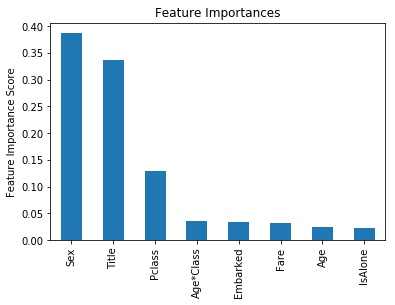

In [0]:
#Choose all Predictors (Independent Variables except the Dependent Variable)
predictors = [x for x in X_train.columns if x not in ['Survived']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=742,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 verbosity=1)


xgb1_score, xgb1_auc, xgb1_rmse = modelfit(xgb1, X_train, Y_train, predictors)

<font color=blue size = 4 >
Step 2: Tune max_depth and min_child_weight

In [0]:
param_test1 = {
 'max_depth':range(4,5,6),
 'min_child_weight':range(1,4,6)
# 'max_depth':range(3,10,2),
# 'min_child_weight':range(1,6,2)

}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=742, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.score, gsearch1.best_params_, gsearch1.best_score_

(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=0.8, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=5, min_child_weight=1,
                                      missing=None, n_estimators=742, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=27, silent=None,
                                      subsample=0.8, verbosity=1),
              iid=False, n_jobs=-1,
              param_grid={'max_depth': range(4, 5, 6),
                          'min_child_weight': range(1, 4, 6)},
     

In [0]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6,10,12]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=742, max_depth=9,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([3.46585107, 2.68729577, 3.01775022, 2.84464774, 2.81857138,
         3.79241519, 3.60607977, 3.3579123 , 2.87376752, 2.69158769,
         4.01049714, 3.73033156, 3.62311673, 2.94797425, 2.31465921]),
  'std_fit_time': array([0.83054582, 0.42704784, 0.10110107, 0.16287632, 0.31242399,
         0.46566506, 0.34883253, 0.04011554, 0.03577512, 0.03550255,
         0.04785935, 0.05096321, 0.30852253, 0.09470363, 0.50740856]),
  'mean_score_time': array([0.02227201, 0.02022815, 0.03481903, 0.01842031, 0.02680421,
         0.03142071, 0.0277225 , 0.02449965, 0.01910229, 0.01997962,
         0.0323297 , 0.02380071, 0.02519979, 0.02327318, 0.01872134]),
  'std_score_time': array([0.00355757, 0.00448891, 0.0162975 , 0.0054297 , 0.0120715 ,
         0.01167916, 0.01177155, 0.00220875, 0.00215433, 0.00102711,
         0.01698762, 0.00172737, 0.01284583, 0.00497237, 0.00741651]),
  'param_max_depth': masked_array(data=[4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6],
        

In [0]:
#we got 6 as optimum value for min_child_weight but we haven’t tried values more than 10. We can do that as follow:

param_test2b = {
 'min_child_weight':[4,5,6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=742, max_depth=4,
 min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train,Y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([3.20985618, 3.07754831, 3.21774855, 2.91439991, 2.7682982 ,
         2.22693944]),
  'std_fit_time': array([0.05976118, 0.16044031, 0.33195076, 0.0692361 , 0.06859967,
         0.50340319]),
  'mean_score_time': array([0.0241735 , 0.02678947, 0.02565293, 0.02282515, 0.02105365,
         0.01519337]),
  'std_score_time': array([0.00207404, 0.0055335 , 0.00963999, 0.00272538, 0.00218423,
         0.00759551]),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 8, 10, 12],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 4},
   {'min_child_weight': 5},
   {'min_child_weight': 6},
   {'min_child_weight': 8},
   {'min_child_weight': 10},
   {'min_child_weight': 12}],
  'split0_test_score': array([0.82371542, 0.8259552 , 0.83596838, 0.84295125, 0.8442029 ,
         0.84703557]),
  'split1_test_score': array([0.83530962, 0.83794466, 0.83333333, 0.83181818, 0.83


Model Report
Accuracy : 0.8215
AUC Score (Train): 0.884045
RMSE (Train): 0.123686


({'mean_fit_time': array([3.20985618, 3.07754831, 3.21774855, 2.91439991, 2.7682982 ,
         2.22693944]),
  'std_fit_time': array([0.05976118, 0.16044031, 0.33195076, 0.0692361 , 0.06859967,
         0.50340319]),
  'mean_score_time': array([0.0241735 , 0.02678947, 0.02565293, 0.02282515, 0.02105365,
         0.01519337]),
  'std_score_time': array([0.00207404, 0.0055335 , 0.00963999, 0.00272538, 0.00218423,
         0.00759551]),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 8, 10, 12],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 4},
   {'min_child_weight': 5},
   {'min_child_weight': 6},
   {'min_child_weight': 8},
   {'min_child_weight': 10},
   {'min_child_weight': 12}],
  'split0_test_score': array([0.82371542, 0.8259552 , 0.83596838, 0.84295125, 0.8442029 ,
         0.84703557]),
  'split1_test_score': array([0.83530962, 0.83794466, 0.83333333, 0.83181818, 0.83

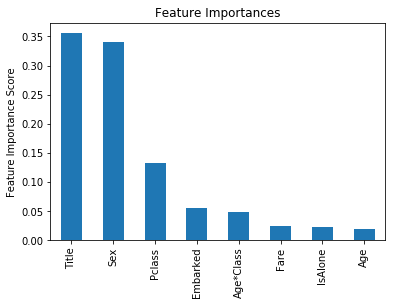

In [0]:
gsearch2_score, gsearch2_auc, gsearch2_rmse = modelfit(gsearch2b.best_estimator_, X_train, Y_train, predictors) 
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

<font color=brown size=4>
  Step 3: Tune gamma <br>
  </font>
  <font color=blue size=3>
Now lets tune gamma value using the parameters already tuned above. Gamma can take various values but I’ll check for 5 values here. You can go into more precise values.

In [0]:
# best params for max_Depth and min_child_weight are 4 and 4 respectively. This is my findings above. 
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=743, max_depth=4,
 min_child_weight=10, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([2.77977223, 2.84641294, 2.85859947, 2.83308744, 2.49406343]),
  'std_fit_time': array([0.05357575, 0.11783442, 0.04324305, 0.13520407, 0.69255639]),
  'mean_score_time': array([0.01807227, 0.02759838, 0.0210753 , 0.02307906, 0.01153331]),
  'std_score_time': array([0.0028636 , 0.00871803, 0.00239862, 0.00808254, 0.00476707]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.8444664 , 0.84512516, 0.8442029 , 0.84341238, 0.84367589]),
  'split1_test_score': array([0.83517787, 0.83781291, 0.83768116, 0.84044796, 0.84071146]),
  'split2_test_score': array([0.89445187, 0.89445187, 0.89525401, 0.89324866, 0.89431818]),
  'split3_test_score': array([0.86604278, 0.86524064, 0.86430481, 0.8657754 , 0.86470588]),

In [0]:
# best params for max_Depth and min_child_weight are 4 and 6 respectively. This is the example i am trying the Tunning learnt from
# analyticsvidya

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=743, max_depth=4,
 min_child_weight=10, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,Y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([2.75247684, 2.7778245 , 2.87385163, 2.87912855, 2.4169693 ]),
  'std_fit_time': array([0.10392626, 0.0332752 , 0.26185398, 0.29334846, 0.4546936 ]),
  'mean_score_time': array([0.02042642, 0.0247448 , 0.02446465, 0.02213311, 0.01359782]),
  'std_score_time': array([0.00149012, 0.01047819, 0.00948548, 0.01054131, 0.00532634]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.8444664 , 0.84512516, 0.8442029 , 0.84341238, 0.84367589]),
  'split1_test_score': array([0.83517787, 0.83781291, 0.83768116, 0.84044796, 0.84071146]),
  'split2_test_score': array([0.89445187, 0.89445187, 0.89525401, 0.89324866, 0.89431818]),
  'split3_test_score': array([0.86604278, 0.86524064, 0.86430481, 0.8657754 , 0.86470588]),

In [0]:
#sorted(sklearn.metrics.SCORERS.keys())


Model Report
Accuracy : 0.8283
AUC Score (Train): 0.885259
RMSE (Train): 0.123891


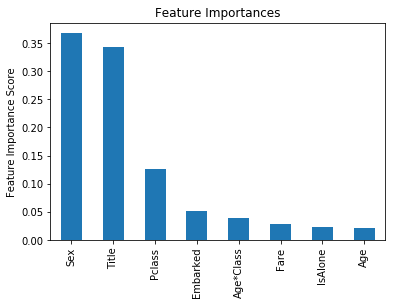

In [0]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb2_score, xgb2_auc, xgb2_rmse = modelfit(xgb2, X_train, Y_train, predictors)

<font color=brown size = 4>
  Best Parameters were thought to be as below but when tried with the first Param1 values and with the Best Gamma got better performance
  </font> <br>
<font color=brown size = 4>
max_depth: 5
<br>
min_child_weight: 1
<br>
gamma: 0
  <br>
<font color=brown size = 5>
Best Parameters max_depth: 5
<br>
min_child_weight: 5
<br>
gamma: 0.2
  <br>

  </font>
  <font color=green size=4>
    Step 4: Tune subsample and colsample_bytree
    <br></font>
  <font color=blue size=3>
The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [0]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(X_train,Y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([2.55191889, 2.57753024, 2.47904682, 2.77002821, 2.4745575 ,
         2.67258167, 2.77633018, 2.77450995, 2.52729864, 2.80510879,
         2.73755436, 2.84156537, 2.56098752, 2.83965306, 2.89236817,
         2.58056135]),
  'std_fit_time': array([0.18870211, 0.17345517, 0.19812741, 0.05494977, 0.03787018,
         0.09299193, 0.30815683, 0.19206021, 0.03219303, 0.18549771,
         0.20888787, 0.04565738, 0.09070187, 0.24767068, 0.04004571,
         0.31581333]),
  'mean_score_time': array([0.01812978, 0.02145095, 0.02401428, 0.01506128, 0.01659665,
         0.01947842, 0.01568484, 0.02186756, 0.01770616, 0.01312981,
         0.018642  , 0.01964417, 0.01701975, 0.02764273, 0.02381763,
         0.01226511]),
  'std_score_time': array([0.00912206, 0.00990306, 0.00927018, 0.00283515, 0.00076235,
         0.00342988, 0.0040353 , 0.00920291, 0.0044234 , 0.00440214,
         0.00072582, 0.00306009, 0.00185409, 0.00924986, 0.00442777,
         0.00484852]),
  'param_c

In [0]:
param_test4a = {
 'n_estimators':[1000, 500, 200, 180, 175],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4a = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid = param_test4a, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4a.fit(X_train,Y_train)
gsearch4a.cv_results_, gsearch4a.best_params_, gsearch4a.best_score_

({'mean_fit_time': array([3.2581799 , 3.41493359, 3.62393427, 3.63975296, 1.64743395,
         1.81194687, 1.81892567, 1.89108739, 0.68949695, 0.78143272,
         0.76026506, 0.75585308, 0.62700424, 0.66017356, 0.65389471,
         0.69303179, 0.63916755, 0.6919754 , 0.64388218, 0.65923934,
         3.35769477, 3.56771379, 3.83441777, 3.84408803, 1.75819697,
         1.89372177, 1.80176196, 1.86493936, 0.68061013, 0.7589725 ,
         0.78663468, 0.78223939, 0.62599702, 0.67969584, 0.68641949,
         0.70902529, 0.63878016, 0.66067743, 0.67839298, 0.69204369,
         3.48542662, 3.63945112, 3.6835659 , 3.93563142, 1.80093298,
         1.8804194 , 1.9164155 , 1.93935413, 0.75675883, 0.77813935,
         0.75711184, 0.78407264, 0.64569674, 0.67401595, 0.73859229,
         0.7327374 , 0.6463995 , 0.68062778, 0.67702494, 0.68974242,
         3.63175421, 4.03428173, 4.09857473, 3.99135456, 1.85201082,
         1.87217197, 2.00200076, 1.90272803, 0.79381161, 0.78733096,
         0.848973

<font color=brown size=4>
Best Params so far <br> 

<font color=green size=4>
Best Params so far <br> 
n_estimators: 743 <br> 
max_depth: 4 <br> 
min_child_weight: 10 <br> 
gamma: 0.4 <br> 
colsample_bytree: 0.9 <br> 
subsample: 0.9 <br> 


Model Report
Accuracy : 0.8272
AUC Score (Train): 0.884934
RMSE (Train): 0.122162


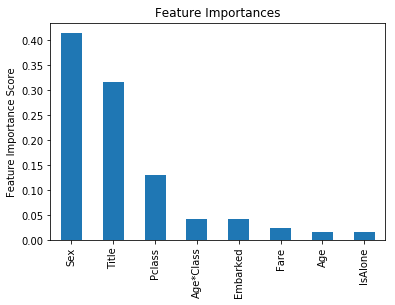

In [0]:
#Choose all Predictors (Independent Variables except the Dependent Variable)
#predictors = [x for x in X_train.columns if x not in ['Survived']]
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb3_score, xgb3_auc, xgb3_rmse = modelfit(xgb3, X_train, Y_train, predictors)

In [0]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train,Y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

In [0]:
#Choose all Predictors (Independent Variables except the Dependent Variable)
#predictors = [x for x in X_train.columns if x not in ['Survived']]
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=7430,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb4_score, xgb4_auc, xgb4_rmse = modelfit(xgb4, X_train, Y_train, predictors)

<font color=red size = 4>
  Step 5: Tuning Regularization Parameters
  <br></font>
  <font color=blue size = 3>
Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune ‘reg_alpha’ value here and leave it upto you to try different values of ‘reg_lambda’

In [0]:
param_test6 = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(X_train,Y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

{'reg_alpha': 1}, Score: 0.8709891643860648)
<font color=green size = 4> 
 We can see that the CV score bettered than the previous case. As the values tried are very widespread, we should try values closer to the optimum here (1) to see if we get something better.

In [0]:
param_test7 = {
'reg_alpha':[0, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 1.1,1.25, 1.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27),param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(X_train,Y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

<font color=brown size=4>
With Regularizing Parameter tried with smallest and above the Optimal, found new Optimal value with better score. But, with reg_alpha set at 0, it has the best score. 

In [0]:
#Choose all Predictors (Independent Variables except the Dependent Variable)
#predictors = [x for x in X_train.columns if x not in ['Survived']]
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=743,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
reg_alpha=0.1)


xgb5_score,xgb5_auc, xgb5_rmse  = modelfit(xgb5, X_train, Y_train, predictors)

<font color=blue size=4> 
Step 6: Reducing Learning Rate
  <br></font>
  <font color=brown size=3> 
Lastly, we should check on learning rate with range and accordingly change number of trees. Lets use the cv function of XGBoost to do the job again.

In [0]:
param_test8 = {
'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
'n_estimators': [1800,750, 500, 180, 90, 50 ]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha=0.1),param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch8.fit(X_train,Y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_

In [0]:
xgb6 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1800,
 max_depth=4,
 min_child_weight=10,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
reg_alpha=0.1)

xgb6_score, xgb6_auc, xgb6_rmse = modelfit(xgb6, X_train, Y_train, predictors)

In [0]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#import xgboost

param_test9 = {    

 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


"""
'n_estimators': [1800,750, 500, 180, 90, 50 ],
'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
'colsample_bytree':[0.3, 0.4, 0.5 , 0.7, 0.8, 0.9],
'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
'min_child_weight':[1,4,5,6,8,10,12],
'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
'subsample':[i/100.0 for i in range(75,90,5)],    
'reg_alpha':[0, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 1.1,1.25, 1.5],
"""




xgb9=xgb.XGBClassifier()

rsearch9 = RandomizedSearchCV(xgb9, param_distributions=param_test9, 
                              n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
rsearch9.fit(X_train,Y_train)
timer(start_time)


In [0]:
rsearch9.best_estimator_, rsearch9.best_params_

In [0]:
xgbrs_score, xgbrs_auc, xgbrs_rmse = modelfit(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
               learning_rate=0.05, max_delta_step=0, max_depth=4,
               min_child_weight=3, missing=None, n_estimators=750, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1), X_train, Y_train, predictors)

<font color=brown size=4>
The score has come down and if we check all the parameter configuration tests done so far, the best with not much tunning is the first one. At least now we know what parameters did not work. I accidentally reduced the Number of Trees by 1/10th, and noticed there is an improvement in the Area Covered %. Optimal n_estimators is found to be 143 with both ACC_Score and AUC improved, slightly. Perhaps, there is a betterment in execution time. Will check on this and post updates.
<font color=brown size=5>    <br>
Will work on this further and this is Work in progress

In [0]:
#Choose all Predictors (Independent Variables except the Dependent Variable)
predictors = [x for x in X_train.columns if x not in ['Survived']]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=143,
 max_depth=5,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


modelfit(xgb1, X_train, Y_train, predictors)

In [0]:
xgb7_score, xgb7_auc, xgb7_rmse = modelfit(XGBClassifier(
 learning_rate =0.1,
 n_estimators=756,
 max_depth=5,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 silent=None, 
 verbosity=1), X_train, Y_train, predictors)

<font color=brown size=5>
Parameter Tuning Evaluation
<font color=black size=3>
Lets rank the evaluation of all the Param Trails to choose the best. 

In [0]:
params = pd.DataFrame({
    'Model': ['XGB1', 'XGB2', 'XGB3', 'XGB4', 'XGB5', 'XGB6', 'GSearch2',  'XGB7'],
    'Score': [xgb1_score, xgb2_score, xgb3_score, xgb4_score, xgb5_score, xgb6_score, gsearch2_score, xgb7_score],
    'AUC': [xgb1_auc, xgb2_auc, xgb3_auc, xgb4_auc, xgb5_auc, xgb6_auc, gsearch2_auc, xgb7_auc],    
    'RMSE': [xgb1_rmse, xgb2_rmse, xgb3_rmse, xgb4_rmse, xgb5_rmse, xgb6_rmse, gsearch2_rmse, xgb7_rmse]        
})
params.sort_values(by='RMSE', ascending=True)

In [0]:
xgb_final = XGBClassifier(
 learning_rate =0.1,
 n_estimators=756,
 max_depth=5,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 silent=None, 
 verbosity=1)

xgb_final.fit(X_train, Y_train)
Y_pred_final=xgb_final.predict(test_Titanic)
xgb_final.score(X_train, Y_train)
acc_xgb_final = round(xgb_final.score(X_train, Y_train) * 100, 2)
acc_xgb_final

In [0]:
Y_train.shape